# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Output File (CSV)
output_data_file = 'output_data/cities.csv'

from citipy import citipy

# Import API key
from api_keys import api_key

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Set seed (guarantee reproducibility)
np.random.seed(1234)
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# URL of weather data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Create list of variables to be extracted
lat = []
temp = []
hum = []
cloud = []
wind = []
country = []
date = []
city = []


In [4]:
# Loop through the list of cities and perform a request for data
for index in range(0,len(cities)):
    response = requests.get(query_url + cities[index]).json()
        
    try:
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city.append(response['name'])
        print(f"Processing Record {1+index} | {cities[index]} | All data is available")
    except (KeyError, IndexError):
        print(f"Processing Record {1+index} | {cities[index]} | Missing field/result... skipping")
    
       


Processing Record 1 | rikitea | All data is available
Processing Record 2 | yunjinghong | Missing field/result... skipping
Processing Record 3 | samusu | Missing field/result... skipping
Processing Record 4 | provideniya | All data is available
Processing Record 5 | havre-saint-pierre | All data is available
Processing Record 6 | cape town | All data is available
Processing Record 7 | tsihombe | Missing field/result... skipping
Processing Record 8 | chumikan | All data is available
Processing Record 9 | belushya guba | Missing field/result... skipping
Processing Record 10 | lavrentiya | All data is available
Processing Record 11 | bambous virieux | All data is available
Processing Record 12 | biak | All data is available
Processing Record 13 | lasa | All data is available
Processing Record 14 | shelbyville | All data is available
Processing Record 15 | jamestown | All data is available
Processing Record 16 | atuona | All data is available
Processing Record 17 | garissa | All data is av

Processing Record 143 | puerto ayora | All data is available
Processing Record 144 | barentsburg | Missing field/result... skipping
Processing Record 145 | arandis | All data is available
Processing Record 146 | clyde river | All data is available
Processing Record 147 | jalu | All data is available
Processing Record 148 | arraial do cabo | All data is available
Processing Record 149 | mangochi | All data is available
Processing Record 150 | aklavik | All data is available
Processing Record 151 | karla | All data is available
Processing Record 152 | amderma | Missing field/result... skipping
Processing Record 153 | namibe | All data is available
Processing Record 154 | makakilo city | All data is available
Processing Record 155 | hofn | All data is available
Processing Record 156 | mahebourg | All data is available
Processing Record 157 | mergui | Missing field/result... skipping
Processing Record 158 | kavieng | All data is available
Processing Record 159 | jimenez | All data is avail

Processing Record 283 | the valley | All data is available
Processing Record 284 | haines junction | All data is available
Processing Record 285 | aspe | All data is available
Processing Record 286 | kaeo | All data is available
Processing Record 287 | tiszanana | All data is available
Processing Record 288 | areosa | All data is available
Processing Record 289 | kautokeino | All data is available
Processing Record 290 | tamandare | All data is available
Processing Record 291 | toropets | All data is available
Processing Record 292 | bredasdorp | All data is available
Processing Record 293 | ambilobe | All data is available
Processing Record 294 | kysucke nove mesto | All data is available
Processing Record 295 | qaanaaq | All data is available
Processing Record 296 | alekseyevsk | All data is available
Processing Record 297 | ingham | All data is available
Processing Record 298 | port hedland | All data is available
Processing Record 299 | maniitsoq | All data is available
Processing 

Processing Record 424 | brownsville | All data is available
Processing Record 425 | isangel | All data is available
Processing Record 426 | letpadan | All data is available
Processing Record 427 | kismayo | Missing field/result... skipping
Processing Record 428 | la sarre | All data is available
Processing Record 429 | basco | All data is available
Processing Record 430 | jining | All data is available
Processing Record 431 | mugur-aksy | All data is available
Processing Record 432 | klyuchi | All data is available
Processing Record 433 | corner brook | All data is available
Processing Record 434 | mirabad | All data is available
Processing Record 435 | ariquemes | All data is available
Processing Record 436 | grindavik | All data is available
Processing Record 437 | umm kaddadah | All data is available
Processing Record 438 | ust-kut | All data is available
Processing Record 439 | shahreza | All data is available
Processing Record 440 | foumban | All data is available
Processing Recor

Processing Record 567 | yei | Missing field/result... skipping
Processing Record 568 | bongandanga | All data is available
Processing Record 569 | kampong thum | All data is available
Processing Record 570 | antalaha | All data is available
Processing Record 571 | susehri | All data is available
Processing Record 572 | uramita | All data is available
Processing Record 573 | sorvag | Missing field/result... skipping
Processing Record 574 | shakawe | All data is available
Processing Record 575 | wailuku | All data is available
Processing Record 576 | disna | Missing field/result... skipping
Processing Record 577 | sao gabriel da cachoeira | All data is available
Processing Record 578 | manokwari | All data is available
Processing Record 579 | flin flon | All data is available
Processing Record 580 | mattru | All data is available
Processing Record 581 | searcy | All data is available
Processing Record 582 | bowen | All data is available
Processing Record 583 | hatillo | All data is avail

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {"City": city,
                "Country": country,
                "Latitude": lat,
                "Temperature": temp,
                "Humidity": hum,
                "Wind Speed": wind,
                "Cloudiness": cloud,
                "Date": date}

weather_data = pd.DataFrame(weather_dict)

weather_data.head()

export_csv = weather_data.to_csv(output_data_file, index = None, header=True)


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

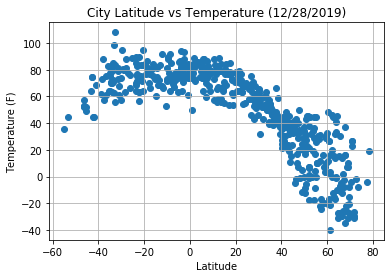

In [11]:
#date of the temperature
date_weather = pd.to_datetime(date[0], unit='s')
#date_weather.month
#date_weather.year
#date_weather.day

# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title('City Latitude vs Temperature ('+str(date_weather.month)+'/'+str(date_weather.day)+'/'+str(date_weather.year)+')')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvsTemperature.png")

#### Latitude vs. Humidity Plot

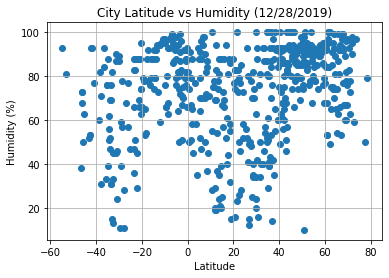

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title('City Latitude vs Humidity ('+str(date_weather.month)+'/'+str(date_weather.day)+'/'+str(date_weather.year)+')')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvsHumidity.png")

#### Latitude vs. Cloudiness Plot

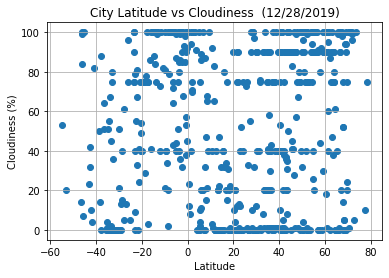

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title('City Latitude vs Cloudiness  ('+str(date_weather.month)+'/'+str(date_weather.day)+'/'+str(date_weather.year)+')')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvsCloudiness.png")

#### Latitude vs. Wind Speed Plot

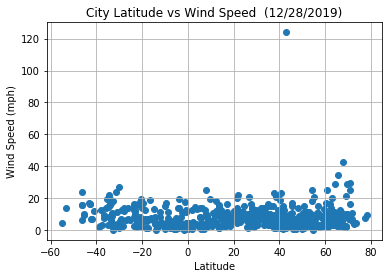

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed  ('+str(date_weather.month)+'/'+str(date_weather.day)+'/'+str(date_weather.year)+')')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvsWindSpeed.png")